#   PREDICTING LOAN REPAYMENT STATUS

**While giving loans to people, banks have to check credit score and determine whether the person would be able to repay the amount or it would be a bad debt to the bank. The idea is to  determine whether the customer would be able to pay back to the bank or not based upon set of attributes, so Banks can issue loan according to probabilities that loan can be repaid**

### About the Dataset
Lending Club is a peer to peer lending company based in the United States, in which investors provide funds for potential borrowers and investors earn a profit depending on the risk they take (the borrowers credit score). Lending Club provides the "bridge" between investors and borrowers.  
We have selected this data set by creating an account on their site, and downloading the publically available dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
import warnings
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, roc_auc_score, cohen_kappa_score, matthews_corrcoef
from sklearn.preprocessing import OneHotEncoder
warnings.filterwarnings("ignore")

### Data Loading and checking Shape

In [3]:
loans = pd.read_csv("loans.csv")
print("DATA SHAPE: ",loans.shape)
print("DATA TYPES:")
print(loans.dtypes)

DATA SHAPE:  (9578, 14)
DATA TYPES:
credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths       float64
delinq.2yrs          float64
pub.rec              float64
not.fully.paid         int64
dtype: object


In [ ]:
loans.head()

### Null Values Treatment

In [4]:
print("Checking target variable data frequency")
print(loans["not.fully.paid"].value_counts())
print("a)If information of certain borrowers is missing, we have to treat it for null values, and that can be done in many ways: Mode, median , mean, deletion. We have to treat it according to the variable and it's description.")
print("Checking total null values in dataset")
print(loans.isna().sum())

Checking target variable data frequency
0    8045
1    1533
Name: not.fully.paid, dtype: int64
a)If information of certain borrowers is missing, we have to treat it for null values, and that can be done in many ways: Mode, median , mean, deletion. We have to treat it according to the variable and it's description.
Checking total null values in dataset
credit.policy         0
purpose               0
int.rate              0
installment           0
log.annual.inc        4
dti                   0
fico                  0
days.with.cr.line    29
revol.bal             0
revol.util           62
inq.last.6mths       29
delinq.2yrs          29
pub.rec              29
not.fully.paid        0
dtype: int64


In [5]:
print("Column = Public Records\nFilling null values: Checking data frequency")
print("Filling null values with mode:0")
print(loans["pub.rec"].value_counts())
loans["pub.rec"].fillna(0, inplace = True)
print("Null values removed for this column")

Column = Public Records
Filling null values: Checking data frequency
Filling null values with mode:0
0.0    8992
1.0     531
2.0      19
3.0       5
5.0       1
4.0       1
Name: pub.rec, dtype: int64
Null values removed for this column


In [6]:
print("Column = Inquiry last 6 months\nFilling null values: Checking data frequency")
print("Filling null values with mode:0")
print(loans["inq.last.6mths"].value_counts().head())
#Filling null values with mode:0
loans["inq.last.6mths"].fillna(0, inplace = True)
print("Null values removed for this column")

Column = Inquiry last 6 months
Filling null values: Checking data frequency
Filling null values with mode:0
0.0    3634
1.0    2459
2.0    1381
3.0     860
4.0     469
Name: inq.last.6mths, dtype: int64
Null values removed for this column


In [7]:
print("Column = Log annual income \nFilling null values: Checking data description")
print("Filling null values with mean : 10.93")
print(loans["log.annual.inc"].describe())
loans["log.annual.inc"].fillna(loans["log.annual.inc"].mean(), inplace = True)
print("Null values removed for this column")

Column = Log annual income 
Filling null values: Checking data description
Filling null values with mean : 10.93
count    9574.000000
mean       10.931874
std         0.614736
min         7.547502
25%        10.558414
50%        10.927987
75%        11.289832
max        14.528354
Name: log.annual.inc, dtype: float64
Null values removed for this column


In [8]:
print("Column = Delinquency 2 years\nFilling null values: Checking data frequency")
print("Filling null values with mode:0")
print(loans["delinq.2yrs"].value_counts())
loans["delinq.2yrs"].fillna(0, inplace = True)
print("Null values removed for this column")

Column = Delinquency 2 years
Filling null values: Checking data frequency
Filling null values with mode:0
0.0     8433
1.0      828
2.0      192
3.0       65
4.0       19
5.0        6
6.0        2
11.0       1
13.0       1
8.0        1
7.0        1
Name: delinq.2yrs, dtype: int64
Null values removed for this column


In [9]:
print("Column = revol.util \nFilling null values: Checking data description")
print(loans["revol.util"].describe())
print("Checking data frequency")
print(loans["revol.util"].value_counts().head())
#Filling null values with mode:0
loans["revol.util"].fillna(int(loans["revol.util"].mode()[0]), inplace = True)
print("Null values removed for this column")

Column = revol.util 
Filling null values: Checking data description
count    9516.000000
mean       46.865677
std        29.018642
min         0.000000
25%        22.700000
50%        46.400000
75%        71.000000
max       119.000000
Name: revol.util, dtype: float64
Checking data frequency
0.0     295
0.5      24
73.7     22
0.3      22
3.3      21
Name: revol.util, dtype: int64
Null values removed for this column


In [10]:
print(loans["days.with.cr.line"].describe())
print("Null value percent for days.with.cr.line: ", loans["days.with.cr.line"].isna().sum()/len(loans)*100, "%")
#Very less % (0.3%) of the data points are null, and we can see that neither of mean, mode or median replacement is possible in this case, we will drop these rows 
loans.dropna(subset=["days.with.cr.line"], inplace = True)
print("Null values removed for this column")

count     9549.000000
mean      4562.026085
std       2497.985733
min        178.958333
25%       2820.000000
50%       4139.958333
75%       5730.000000
max      17639.958330
Name: days.with.cr.line, dtype: float64
Null value percent for days.with.cr.line:  0.3027771977448319 %
Null values removed for this column


In [11]:
print(loans.isna().sum())
print("\n**********Null value treatment complete**********")

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

**********Null value treatment complete**********


## DATA VISUALISATION (EDA)

### Question 1: What type of loans are not repaid most of the times?

In [17]:
pu = list(loans.purpose.unique())
not_paid_0 = []
for i in pu:
    not_paid_0.append(list(loans[loans["purpose"]==i]["not.fully.paid"].value_counts())[0]/sum(list(loans[loans["purpose"]==i]["not.fully.paid"].value_counts())))

In [18]:
not_paid_1 = []
for i in range(len(not_paid_0)):
    not_paid_1.append(1-not_paid_0[i])

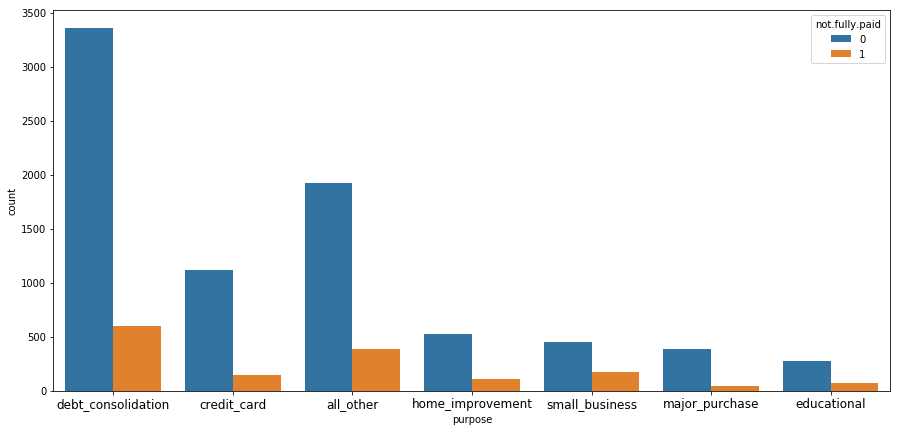

In [19]:
purp = list(loans.purpose.unique())
plt.figure(figsize=(15,7))
ax = sns.countplot(x= loans.purpose, hue=loans['not.fully.paid'])
ax.set_xticklabels(purp, fontsize=12)
plt.show()

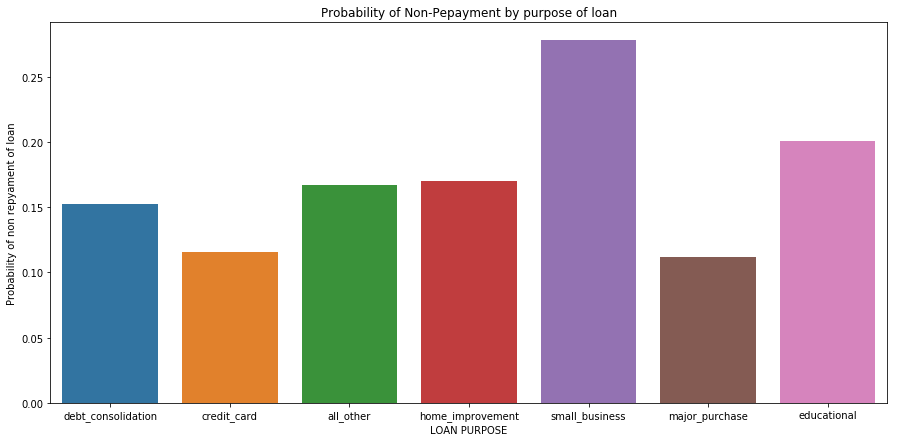

In [20]:
plt.figure(figsize=(15,7))
ax = sns.barplot(x = purp, y = not_paid_1)
plt.ylabel("Probability of non repyament of loan")
plt.xlabel("LOAN PURPOSE")
plt.title("Probability of Non-Pepayment by purpose of loan")
plt.show()

Most Unpaid loans come from Small Businesses, then education loana, then home improvement.

### Question 2: How does interest rate vary with Loan Repayment Status?

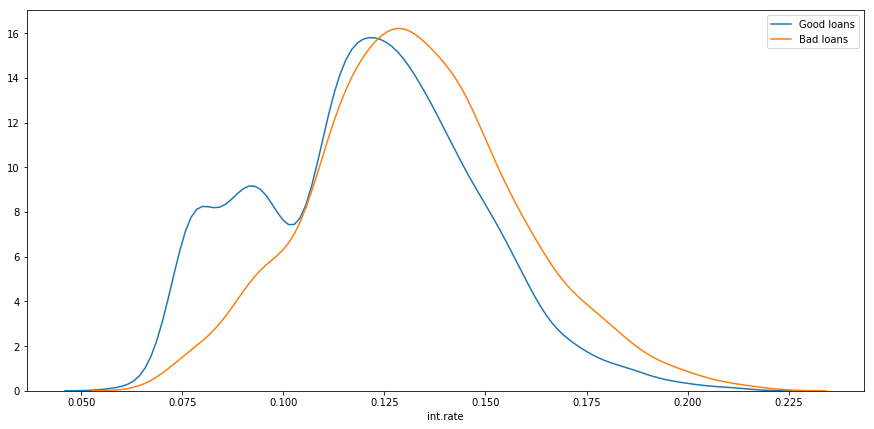

In [30]:
plt.figure(figsize=(15,7))
good = loans.loc[loans["not.fully.paid"] == 0, 'int.rate']
bad = loans.loc[loans["not.fully.paid"] == 1, 'int.rate']
sns.distplot(good, label='Good loans',hist=False)
ax = sns.distplot(bad, label='Bad loans', hist=False)
ax.legend()
plt.show()

For good loans, we can see that data is skewed towards the left (lower interest rate) and for bad loans, data is skewed to the right (higher interest rates), which shows that interest rate is an important parameter for determining whether a loan will be repaid or not

### Label Encoding

In [24]:
print("Label Encoding Column 'Purpose'")
le =LabelEncoder()
loans.purpose = le.fit_transform(loans.purpose)
x = loans[loans.columns[~loans.columns.isin(['not.fully.paid'])]]
y = loans[loans.columns[loans.columns.isin(['not.fully.paid'])]]
print("Oversampling data to make balanced label dataset using SMOTE oversampling******")
sm = SMOTE()
x, y = sm.fit_resample(x,y)
print("Splitting data into training and testing: ratio = 80:20****")
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

Label Encoding Column 'Purpose'
Oversampling data to make balanced label dataset using SMOTE oversampling******
Splitting data into training and testing: ratio = 80:20****


### Evaluation Metrics

In [25]:
#metrics evaluator function
def model_performance(y_test, y_pred):
    print("**********TESTING MODEL USING METRICS************")
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print("Accuracy: ", np.round(accuracy_score(y_test, y_pred),3)*100)
    print("Sensitivity: ", np.round(recall_score(y_test, y_pred),3)*100)
    print("Specificity: ", np.round(tn/(tn+fp),3)*100)
    print("ROC AUC: ", np.round(roc_auc_score(y_test, y_pred),3)*100)
    print("Kappa Score: ", np.round(cohen_kappa_score(y_test, y_pred),3))
    print("Mathews Correlation Coeff", np.round(matthews_corrcoef(y_test, y_pred),3))

#### MODELS

Random Forest

In [26]:
#RANDOM FOREST CLASSIFIER with bootstrapping
print("Data training: Random Forest Classifier")
rf = RandomForestClassifier(n_estimators=600,bootstrap=True)
rf.fit(x_train, y_train)
y_pred  = rf.predict(x_test)
print("Training Complete")
print(model_performance(y_test, y_pred), "\n")

Data training: Random Forest Classifier
Training Complete
**********TESTING MODEL USING METRICS************
Accuracy:  91.0
Sensitivity:  84.6
Specificity:  97.3
ROC AUC:  91.0
Kappa Score:  0.82
Mathews Correlation Coeff 0.827
None 



Extra Tree Classifier

In [27]:
#EXTRA TREE CLASSIFIER with bootstrapping
print("Data training: Extra Trees Classifier")
etc = ExtraTreesClassifier(n_estimators=600,bootstrap=True)
etc.fit(x_train, y_train)
y_pred  = etc.predict(x_test)
print("Training Complete")
print(model_performance(y_test, y_pred), "\n")

Data training: Extra Trees Classifier
Training Complete
**********TESTING MODEL USING METRICS************
Accuracy:  91.10000000000001
Sensitivity:  87.4
Specificity:  94.69999999999999
ROC AUC:  91.10000000000001
Kappa Score:  0.822
Mathews Correlation Coeff 0.824
None 



## What is the best suited evaluating metrics for this dataset? 
For repayment dectection, we have to have highly sensitive data, since we have to decrease the false negatives more than false postives: i.e.: No repayment calls not detected wrongly are more costly than non correct repayment calls wrongly detected.  
Accuracy is not an accurate predictor, since data is highly imbalanced, even if the model is bad, it will predict 0 more easily and will have high accuracy..  
Cohen's kappa and Mathews correlation both are good metrics. Mathew's correlation tells how good a binary classifier is. Our score (0.8) is a good score

### Question 3: What are the most important Factors that contribue to Loan repayment

c)What 5 factors affect loan repayment the most?
5 most important features are:  inq.last.6mths, credit.policy, purpose, int.rate, fico


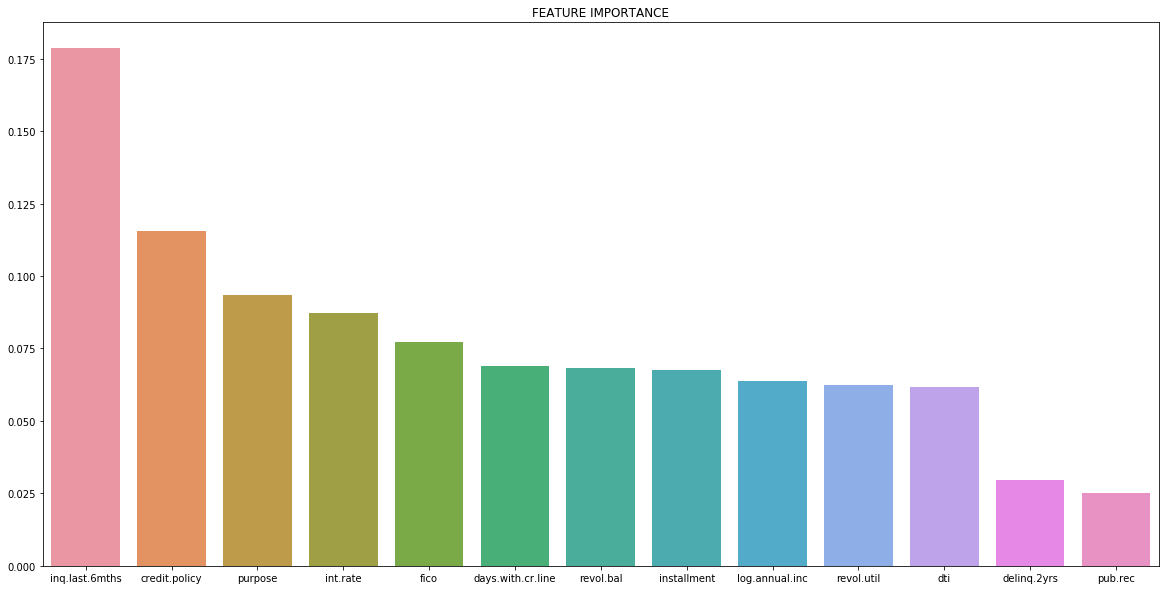

In [28]:
print("c)What 5 factors affect loan repayment the most?")
#****FEATURE IMPORTANCE****
#storing indexes of sorted array of feature importance
index = np.argsort(rf.feature_importances_)[::-1]
#sorting array according to increasing feature importance
features = sorted(rf.feature_importances_)[::-1]
cols = list(loans.columns)
cols.remove("not.fully.paid")
col_order = [cols[i] for i in index]
print("5 most important features are: ", ", ".join(col_order[:5]))
plt.figure(figsize=(20,10))
sns.barplot(col_order, features)
plt.title("FEATURE IMPORTANCE")
plt.show()

### Question 4: 5 Best and 5 worst borrowers from the data

In [29]:
print("b)Identify 5 best borrowers that will repay the entire amount. ")
#Highest probability of repaying the amount
x = loans[loans.columns[~loans.columns.isin(['not.fully.paid'])]]
y = loans[loans.columns[loans.columns.isin(['not.fully.paid'])]]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)
probs = rf.predict_proba(x_test)
high_best = []
high_worst = []
for i in range(len(probs)):
    high_best.append(probs[i][0])
    high_worst.append(probs[i][1])
index_best = np.argsort(high_best)[::-1]
high_best = sorted(high_best)[::-1]
index_worst = np.argsort(high_worst)[::-1]
high_worst = sorted(high_worst)[::-1]
print("From our given dataset, we see rows with these 5 indexes with highest probability of repyaing the amount",  index_best[:5], "with probabilities: ", high_best[:5],"\n")
print("From our given dataset, we see rows with these 5 indexes with highest probability of not repyaing the amount",  index_worst[:5], "with probabilities: ", high_worst[:5])


b)Identify 5 best borrowers that will repay the entire amount. 
From our given dataset, we see rows with these 5 indexes with highest probability of repyaing the amount [ 977 1670 1262 1289 1535] with probabilities:  [1.0, 1.0, 0.9983333333333333, 0.9983333333333333, 0.9983333333333333] 

From our given dataset, we see rows with these 5 indexes with highest probability of not repyaing the amount [  43 1328 1820  393  520] with probabilities:  [0.9316666666666666, 0.93, 0.8933333333333333, 0.8916666666666667, 0.8916666666666667]


### Question 5: How FICO Score influences Interest Rate?

FICO score is the credit score a person has. This score used by many lenders, and often range from 300 to 850. A good credit score is considered over 650. We can see that loans are granted to customers with SCORE >650. Higher the FICO Score, lower the interest rate.

Correlation:  -0.7150089610860461


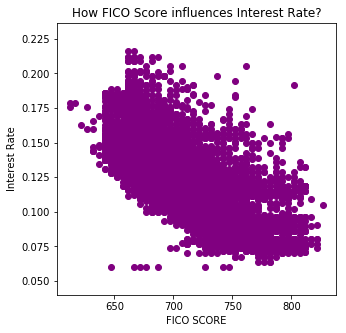

In [39]:
plt.figure(figsize=(5,5))
plt.scatter( loans["fico"], loans["int.rate"], color = 'purple')
plt.xlabel("FICO SCORE")
plt.ylabel("Interest Rate")
plt.title("How FICO Score influences Interest Rate?")
print("Correlation: ",np.corrcoef(loans["fico"], loans["int.rate"])[0][1])
plt.show()

### How all the variables are associated with our target variable?

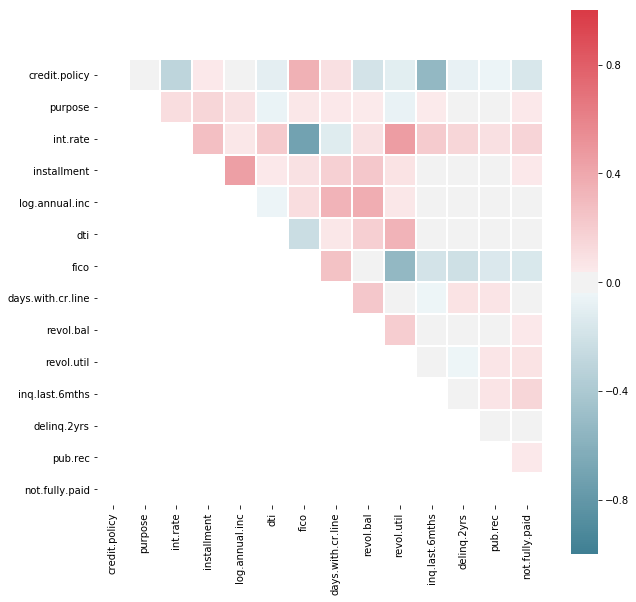

In [40]:
fig, ax = plt.subplots(figsize=(10,10)) 
corr = loans.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.tril_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, cmap=cmap,linewidths=1, vmin=-1, vmax=1, square=True, cbar=True, center=0, ax=ax, mask=mask)
plt.show()